# Find dihedral angles between atoms with sdf files and RDKit

In [598]:
import pandas as pd
import numpy as np
import seaborn as sns
import datamol as dm
import rdkit.Chem as Chem

In [599]:
import os
cwd=os.getcwd()
print(f'cwd={cwd}')

cwd=c:\Users\jaina\Box\RDKit_Utility_Functions


## Dihedral angle from the mol 

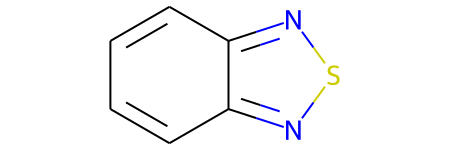

In [600]:
mol=Chem.MolFromSmiles('c1ccc2nsnc2c1')
mol

# Label every atom

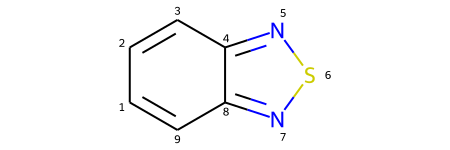

In [601]:
# Iterate over the atoms
for atom in mol.GetAtoms():
    # For each atom, set the property "atomNote" to a index+1 of the atom
    atom.SetProp("atomNote", str(atom.GetIdx()+1))

mol

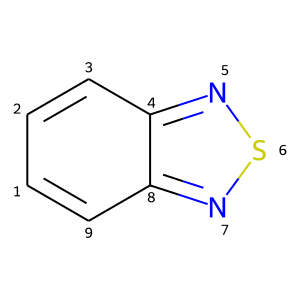

In [602]:
dm.to_image(mols=mol)

## Find dihedral angles between (3,4,8,9) and (5,4,8,7)

In [603]:
from rdkit.Chem import AllChem
mol = Chem.AddHs(mol)
# AllChem.Compute2DCoords(mol)
AllChem.EmbedMolecule(mol)
AllChem.UFFOptimizeMolecule(mol)
conformer = mol.GetConformer()

In [604]:
def calc_dihedraldeg(conf,hit_ats):
    angle=Chem.rdMolTransforms.GetDihedralDeg(conf,hit_ats[0],hit_ats[1],hit_ats[2],hit_ats[3])
    angle=abs(angle)
    return round(angle,2)

# Find dihedral angles between (1,2,3,4)

In [605]:
calc_dihedraldeg(conf = conformer,hit_ats=[1,2,3,4])

180.0

# Find dihedral angles between (5,4,8,7)

In [606]:
calc_dihedraldeg(conf = conformer,hit_ats=[5,4,8,7])

0.0

# Match the substructre to find indices of N-C=C-C atoms and calculate the dihedral angles, given sdf files

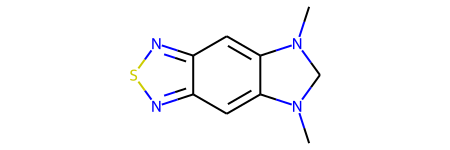

In [607]:
mol=Chem.MolFromSmiles('CN1CN(C)c2cc3nsnc3cc21')
mol

# Find the indices of N-C=C-C substructures and calculate the dihedral angles
- N-C=C-C 
- calculate the dihedral angles

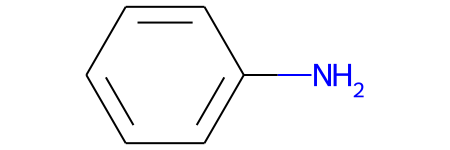

In [ ]:
patt=Chem.MolFromSmiles('NC1=CC=CC=C1')
patt

In [608]:
hit_ats=mol.GetSubstructMatches(patt)
print(f"idx hit_ats = {hit_ats}")

idx hit_ats = ((1, 13, 12, 11, 7, 6, 5), (3, 5, 6, 7, 11, 12, 13))


In [609]:
hit_ats_0_sym=[mol.GetAtoms()[i].GetSymbol() for i in hit_ats[0]]
hit_ats_1_sym=[mol.GetAtoms()[i].GetSymbol() for i in hit_ats[1]]
print(f"idx hit_ats[0] = {hit_ats[0]}")
print(f"symbol hit_ats_sym[0] = {hit_ats_0_sym}")
print(f"idx hit_ats[1] = {hit_ats[1]}")
print(f"symbol hit_ats_sym[1] = {hit_ats_1_sym}")

idx hit_ats[0] = (1, 13, 12, 11, 7, 6, 5)
symbol hit_ats_sym[0] = ['N', 'C', 'C', 'C', 'C', 'C', 'C']
idx hit_ats[1] = (3, 5, 6, 7, 11, 12, 13)
symbol hit_ats_sym[1] = ['N', 'C', 'C', 'C', 'C', 'C', 'C']


# Pick only first 4 elements for N-C=C-C

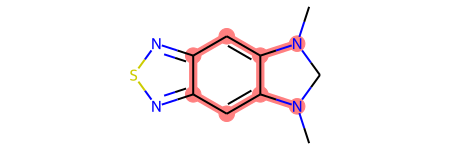

In [610]:
mol

In [611]:
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
AllChem.UFFOptimizeMolecule(mol)
conformer = mol.GetConformer()
calc_dihedraldeg(conf=conformer,hit_ats=hit_ats[0]), calc_dihedraldeg(conf=conformer,hit_ats=hit_ats[1])

(180.0, 180.0)

# Read sdf or xyz files and then find the dihedral angles of all N-C=C-C

## to convert xyz to sdf [use](https://github.com/jensengroup/xyz2mol)
- example: python xyz2mol.py examples/chiral_stereo_test.xyz -o sdf > save_file.sdf

## read sdf files from the folder

In [612]:
# deviation from the 0 or 180 degrees as a descriptor of planarity
# 0 or close to 0 values means more planarity
def calc_dihedraldeg_plane(conf,hit_ats):
    angle=Chem.rdMolTransforms.GetDihedralDeg(conf,hit_ats[0],hit_ats[1],hit_ats[2],hit_ats[3])
    angle=abs(angle)
    return round(min(angle,180-angle),2)

# Read sdf files from the folder and save paths in a list

In [613]:
folder=(r"./Data/sdf_files/")
files=[]
for j in os.listdir(folder):
    if 'xyz' not in j:
        files.append(folder+j)  
len(files)
files

['./Data/sdf_files/acyclic_btz_2amines_red_F-final.sdf',
 './Data/sdf_files/btz.sdf',
 './Data/sdf_files/BTZ6_F-final.sdf',
 './Data/sdf_files/double6_red_F-final.sdf',
 './Data/sdf_files/triple6_red_F-final.sdf']

In [614]:
mols=[]
for file in files:
    suppl = Chem.SDMolSupplier(file)
    for mol in suppl:
        mols.append(mol)
# mols

[01:11:36] Warning: molecule is tagged as 3D, but all Z coords are zero


# visualize molecules in sdf files

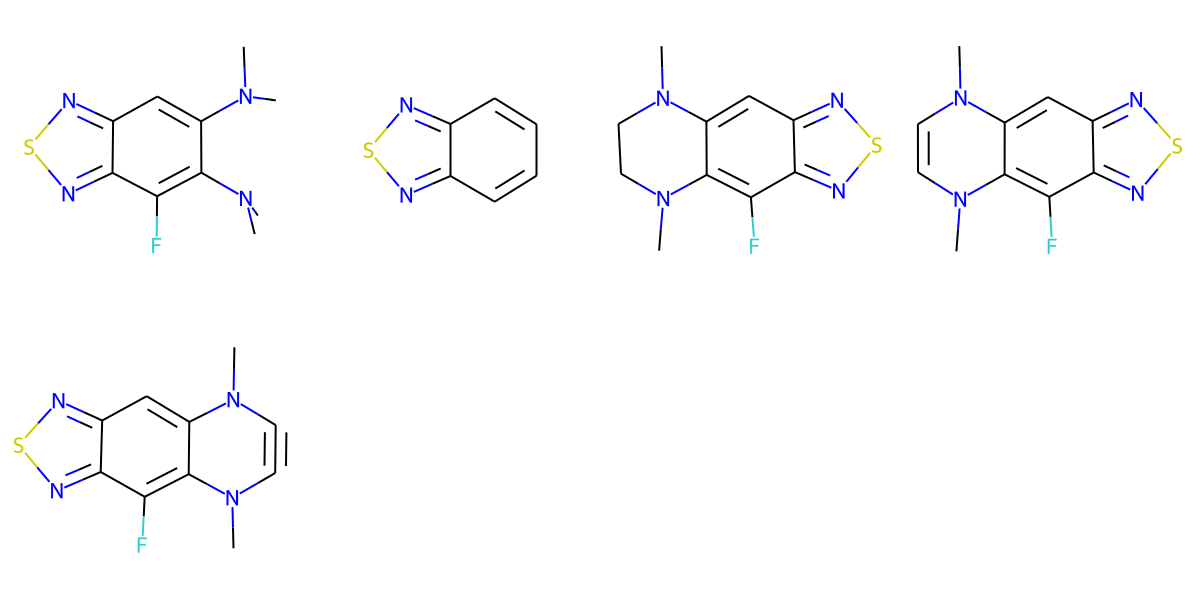

In [615]:
dm.to_image(mols=mols)

In [616]:
print(f"abs(dihedral_angle_0)={calc_dihedraldeg(conf=conformer,hit_ats=hit_ats[0])}, abs(dihedral_angle_1)={calc_dihedraldeg(conf=conformer,hit_ats=hit_ats[1])}")
print(f"deviation from the 180 or 0 degrees of (1) N-C=C-C = {calc_dihedraldeg_plane(conf=conformer,hit_ats=hit_ats[0])}, and (2) N-C=C-C = {calc_dihedraldeg_plane(conf=conformer,hit_ats=hit_ats[1])}")

abs(dihedral_angle_0)=180.0, abs(dihedral_angle_1)=180.0
deviation from the 180 or 0 degrees of (1) N-C=C-C = 0.0, and (2) N-C=C-C = 0.0


# Calculate mean dihedral angle of all N-C=C-C

In [ ]:
def get_dihedral_angle_mean(file=None,patt=Chem.MolFromSmiles('NC1=CC=CC=C1')):       
    """
    This function will give the number of substructure found, and the mean abs(dihedral angle) 
    if no substructre then return dihedral angle = 1000
    """
    if file is not None:
        suppl = Chem.SDMolSupplier(file)
        for mol in suppl:
            hit_ats = list(mol.GetSubstructMatches(patt))
            
            conf = mol.GetConformer()
            
            dihedral=0

            if len(hit_ats)>0:
                for hit in hit_ats:
                    
                    dihedral+=calc_dihedraldeg(conf=conf,hit_ats=hit)

                return len(hit_ats),round(dihedral/len(hit_ats),2)
            else: 
                return len(hit_ats),1000
        


    else:
        print(f"give file address")
        return None
            

In [617]:
# results={"files":}
numsub=[]
dihedreal=[]
for file in files:
    # print(file)
    num1,dih=get_dihedral_angle_mean(file=file)
    numsub.append(num1)
    dihedreal.append(dih)

[01:11:36] Warning: molecule is tagged as 3D, but all Z coords are zero


In [618]:
len(files),len(numsub),len(dihedreal)

(5, 5, 5)

In [619]:
results={"file":files,
"num":numsub,
"dihedral":dihedreal}
df=pd.DataFrame(results)
df

,file,num,dihedral
0,./Data/sdf_files/acyclic_btz_2amines_red_F-fin...,2,177.29
1,./Data/sdf_files/btz.sdf,0,1000.00
2,./Data/sdf_files/BTZ6_F-final.sdf,2,174.14
3,./Data/sdf_files/double6_red_F-final.sdf,2,179.98
4,./Data/sdf_files/triple6_red_F-final.sdf,2,167.20


# Calculate mean deviation of dihedral angle from the 0 or 180 degrees of all N-C=C-C

In [620]:
def get_dihedral_angle_desc(file=None,patt=Chem.MolFromSmiles('NC1=CC=CC=C1')):       
    """
    This function will give the number of substructure found, and the mean of min(dihedral angle,180-dihedral angle) of all N-C=C-C substructures 
    if no substructre then return dihedral angle = 1000
    """
    if file is not None:
        suppl = Chem.SDMolSupplier(file)
        for mol in suppl:
            hit_ats = list(mol.GetSubstructMatches(patt))
            
            conf = mol.GetConformer()
            
            dihedral=0

            if len(hit_ats)>0:
                for hit in hit_ats:
                    
                    dihedral+=calc_dihedraldeg_plane(conf=conf,hit_ats=hit)

                return len(hit_ats),round(dihedral/len(hit_ats),2)
            else: 
                return len(hit_ats),1000
        


    else:
        print(f"give file address")
        return None
            

In [621]:
# results={"files":}
numsub=[]
dihedreal=[]
for file in files:
    # print(file)
    num1,dih=get_dihedral_angle_desc(file=file)
    numsub.append(num1)
    dihedreal.append(dih)

[01:11:37] Warning: molecule is tagged as 3D, but all Z coords are zero


In [622]:
print(len(files),len(numsub),len(dihedreal))
results={"file":files,
"num":numsub,
"dihedral_desc":dihedreal}
df=pd.DataFrame(results)
df

5 5 5


,file,num,dihedral_desc
0,./Data/sdf_files/acyclic_btz_2amines_red_F-fin...,2,2.71
1,./Data/sdf_files/btz.sdf,0,1000.00
2,./Data/sdf_files/BTZ6_F-final.sdf,2,5.86
3,./Data/sdf_files/double6_red_F-final.sdf,2,0.02
4,./Data/sdf_files/triple6_red_F-final.sdf,2,12.80
